## MSP Prediction and price calculation:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [4]:
path=r'/home/itm/Desktop/msp.csv'
df=pd.read_csv(path)

In [5]:
df.head()

,Sl. No.,Crops,Commodity,Variety,2000-01,2017-18,2023-24
0,1,Kharif Crops,Paddy,Common,510,1550,2183
1,2,Kharif Crops,Paddy,Grade 'A',540,1590,2203
2,3,Kharif Crops,Jowar,NaN,445,1700,3180
3,4,Kharif Crops,Bajra,NaN,445,1425,2500
4,5,Kharif Crops,Ragi,NaN,445,1900,3846


In [6]:
df.shape

(25, 7)

In [7]:
df.size

175

In [8]:
df.describe()

,Sl. No.,2000-01,2017-18,2023-24
count,25.000000,25.00000,25.000000,25.000000
mean,13.000000,1152.20000,3679.400000,5608.440000
std,7.359801,773.86756,1683.036888,2734.364507
min,1.000000,445.00000,1410.000000,1735.000000
25%,7.000000,540.00000,1735.000000,3180.000000
50%,13.000000,1170.00000,4050.000000,5650.000000
75%,19.000000,1200.00000,4450.000000,7000.000000
max,25.000000,3500.00000,6785.000000,11750.000000


In [9]:
df.info

<bound method DataFrame.info of     Sl. No.         Crops          Commodity        Variety  2000-01  2017-18  \
0         1  Kharif Crops              Paddy         Common      510     1550   
1         2  Kharif Crops              Paddy      Grade 'A'      540     1590   
2         3  Kharif Crops              Jowar            NaN      445     1700   
3         4  Kharif Crops              Bajra            NaN      445     1425   
4         5  Kharif Crops               Ragi            NaN      445     1900   
5         6  Kharif Crops              Maize            NaN      445     1425   
6         7  Kharif Crops        Arhar (Tur)            NaN     1200     5450   
7         8  Kharif Crops              Moong            NaN     1200     5575   
8         9  Kharif Crops               Urad            NaN     1200     5400   
9        10  Kharif Crops             Cotton  Medium Staple     1625     4020   
10       11  Kharif Crops             Cotton    Long Staple     1825     4320

In [10]:
df['2000-01'].isnull().value_counts()

2000-01
False    25
Name: count, dtype: int64

In [11]:
df.dropna()

,Sl. No.,Crops,Commodity,Variety,2000-01,2017-18,2023-24
0,1,Kharif Crops,Paddy,Common,510,1550,2183
1,2,Kharif Crops,Paddy,Grade 'A',540,1590,2203
9,10,Kharif Crops,Cotton,Medium Staple,1625,4020,6620
10,11,Kharif Crops,Cotton,Long Staple,1825,4320,7020
13,14,Kharif Crops,Soyabean,Yellow,865,3050,4600
22,23,Other Crops,Copra,Milling,3250,6500,10860
23,24,Other Crops,Copra,Ball,3500,6785,11750


In [12]:
df.columns

Index(['Sl. No.', 'Crops', 'Commodity', 'Variety', '2000-01', '2017-18',
       '2023-24'],
      dtype='object')

In [13]:
df.drop(['Sl. No.'],axis=1,inplace=True)

In [14]:
df['Commodity'].value_counts()

Commodity
Paddy                2
Cotton               2
Copra                2
Ragi                 1
Bajra                1
Jowar                1
Arhar (Tur)          1
Maize                1
Urad                 1
Moong                1
Sunflower Seed       1
Soyabean             1
Sesamum              1
Groundnut            1
Nigerseed            1
Wheat                1
Gram                 1
Barley               1
Masur (Lentil)       1
Rapeseed/ Mustard    1
Safflower            1
Jute                 1
Name: count, dtype: int64

In [15]:
df.columns

Index(['Crops', 'Commodity', 'Variety', '2000-01', '2017-18', '2023-24'], dtype='object')

<Axes: xlabel='2000-01', ylabel='2017-18'>

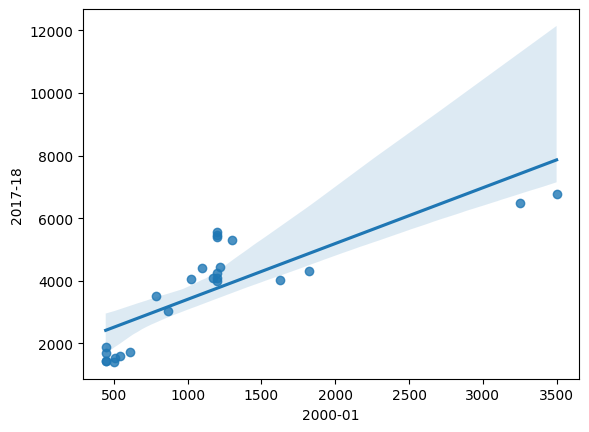

In [17]:
sns.regplot(x='2000-01',y='2017-18',data=df)

<Axes: xlabel='Crops', ylabel='2023-24'>

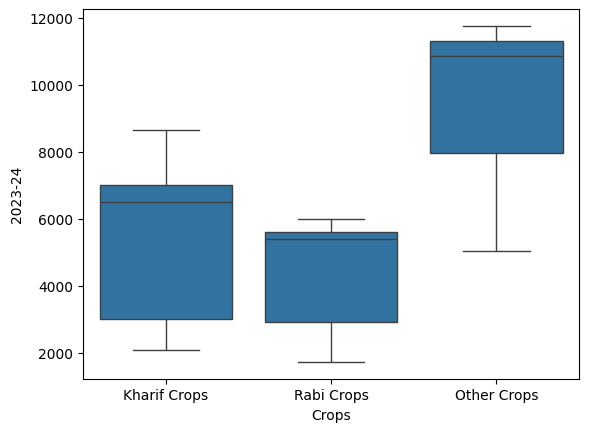

In [18]:
sns.boxplot(x='Crops',y='2023-24',data=df)

In [20]:
lm=LinearRegression()
lm.fit(df[['2000-01','2017-18']],df['2023-24'])

LinearRegression()

In [21]:
yhat=lm.predict(df[['2000-01','2017-18']])

In [23]:
yhat

array([ 2441.25491796,  2517.38293094,  2562.12856789,  2230.01647717,
        2803.66463387,  2230.01647717,  7791.08659979,  7942.04664103,
        7730.70258329,  6458.23172509,  7006.00782268,  6601.95346975,
        6132.89735463,  4581.98821035,  7702.67054961,  5938.04613914,
        2757.4117783 ,  2262.90607184,  6430.28625409,  6341.87020391,
        6039.95012144,  6160.71815443, 10960.238932  , 11536.26782429,
        5051.25555936])

## Assumptions:
    -The logistics cost is Rs.35 per km
    -Profit to APP=+10% from industry +2% from logistics


In [24]:
df1=pd.DataFrame(yhat)

In [ ]:
#adding 12 percent profit to final price
df1=df1+(df1*1.2)

In [41]:
df1.columns=['Predicted MSP cost of crops in Rupees per Quintal']

In [42]:
df1=df1.astype(int)

In [43]:
df1.head()

,Predicted MSP cost of crops in Rupees per Quintal
0,5370
1,5538
2,5636
3,4906
4,6168


In [46]:
df2=df[['Commodity']]

In [47]:
pd.concat([df2,df1],axis=1)

,Commodity,Predicted MSP cost of crops in Rupees per Quintal
0,Paddy,5370
1,Paddy,5538
2,Jowar,5636
3,Bajra,4906
4,Ragi,6168
5,Maize,4906
6,Arhar (Tur),17140
7,Moong,17472
8,Urad,17007
9,Cotton,14208


    -Submission by: Gandharv Gupta